<a href="https://colab.research.google.com/github/LongHuu100/QR-ART/blob/master/QRCode_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers transformers accelerate torch xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [2]:
import torch
from PIL import Image
from diffusers import StableDiffusionControlNetImg2ImgPipeline, ControlNetModel, DDIMScheduler
from diffusers.utils import load_image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
# controlnet = ControlNetModel.from_pretrained("DionTimmer/controlnet_qrcodecode-control_v1p_sd15", torch_dtype=torch.float16)
controlnet = ControlNetModel.from_pretrained("DionTimmer/controlnet_qrcode-control_v11p_sd21", torch_dtype=torch.float16)

config.json:   0%|          | 0.00/988 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

In [4]:
# pipe = StableDiffusionControlNetImg2ImgPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", controlnet=controlnet, safety_checker=None, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetImg2ImgPipeline.from_pretrained("stabilityai/stable-diffusion-2-1", controlnet=controlnet, safety_checker=None, torch_dtype=torch.float16)


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [5]:
pipe.enable_xformers_memory_efficient_attention()
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

In [6]:
def resize_image(input_image: Image, resolution: int):
  input_image = input_image.convert("RGB")
  W, H = input_image.size
  k = float(resolution) / min(H, W)
  H *= k
  W *= k
  H = int(round(H / 64.0)) * 64
  W = int(round(W / 64.0)) * 64
  img = input_image.resize((W, H), resample=Image.LANCZOS)
  return img

  0%|          | 0/135 [00:00<?, ?it/s]

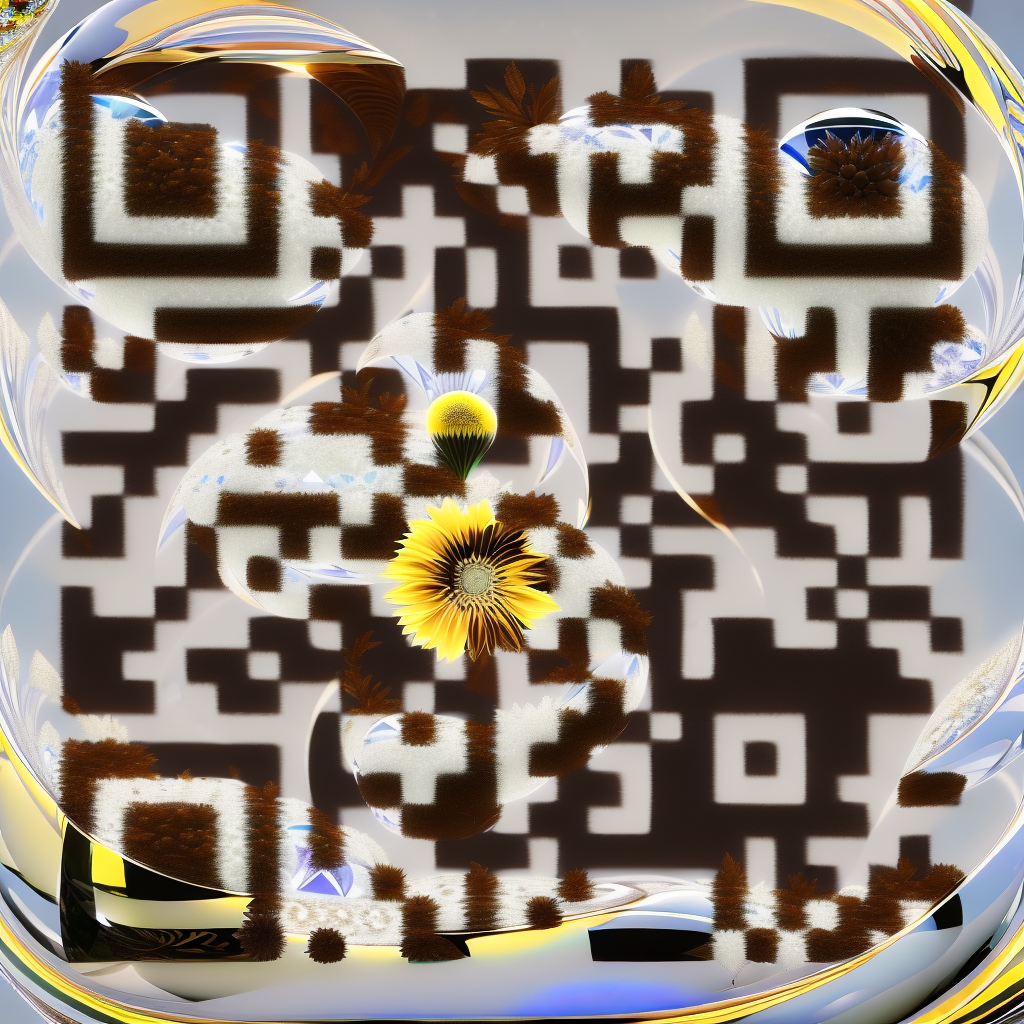

In [11]:
orriginal_qr_code_image = load_image('/content/code_with_block.png')
img_path = 'https://images.squarespace-cdn.com/content/v1/59413d96e6f2e1c6837c7ecd/1536503659130-R84NUPOY4QPQTEGCTSAI/15fe1e62172035.5a87280d713e4.png'
# img_path = load_image('/content/test.png')
init_image = load_image(img_path)
condition_image = resize_image(orriginal_qr_code_image, 1024)
init_image = resize_image(init_image, 1024)
generator = torch.manual_seed(123121231)
image = pipe(prompt="spherical Terrarium, abstract, ((one sunflower which has a blue eye)), ivy,wild,orb,fantasy,complex,gemstone,highly detailed,intricate,elaborate,octane render,4k HDR,(colorful:1.2),fractal,black background,ecosystem,glowing,reflection,crepuscular rays,(luminescence:1.2),",
             negative_prompt="ugly, disfigured, low quality, blurry, nsfw, worst quality, illustration, drawing",
             image=init_image,
             control_image=condition_image,
             width=1024,
             height=1024,
             guidance_scale=20,
             controlnet_conditioning_scale=2.5,
             generator=generator,
             strength=0.9,
             num_inference_steps=150,
            )

image.images[0]